In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url = 'https://www.melon.com/chart/'
driver.get(url)

from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\keb20\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache


In [3]:
song_data = []
rank = 1
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select('div.rank01 > span > a')[0].text
    singer = song.select('div.rank02 > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank = rank + 1

In [4]:
import pandas as pd
columns = ['서비스', '순위', '제목', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.head()

,서비스,순위,제목,가수
0,Melon,1,그때 그 순간 그대로 (그그그),WSG워너비 (가야G)
1,Melon,2,보고싶었어,WSG워너비 (4FIRE)
2,Melon,3,LOVE DIVE,IVE (아이브)
3,Melon,4,POP!,나연 (TWICE)
4,Melon,5,That That (prod. & feat. SUGA of BTS),싸이 (PSY)


In [6]:
pd_data.to_excel('./Downloads/melon.xlsx', index=False)

In [8]:
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [13]:
songs = soup.select('table.byChart > tbody > tr')
print(len(songs))

100


In [16]:
song_data = []
rank = 1
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1

In [17]:
import pandas as pd
columns = ['서비스', '순위', '제목', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   제목      100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [18]:
pd_data.to_excel('./Downloads/bugs.xlsx', index=False)

In [19]:
url = 'https://www.genie.co.kr/chart/top200'
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [24]:
song_data = []
rank = 1
songs = soup.select('tbody > tr')
for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1

In [28]:
import pandas as pd
columns = ['서비스', '순위', '제목', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.to_excel('./Downloads/genie.xlsx', index=False)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     50 non-null     object
 1   순위      50 non-null     int64 
 2   제목      50 non-null     object
 3   가수      50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [26]:
import pandas as pd
excel_names = ['./Downloads/melon.xlsx', './Downloads/bugs.xlsx', './Downloads/genie.xlsx']
appended_data = pd.DataFrame()
for name in excel_names:
    pd_data = pd.read_excel(name)
    appended_data = appended_data.append(pd_data)
appended_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   제목      250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [27]:
appended_data.to_excel('./Downloads/total.xlsx', index=False)

In [29]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
driver.get(url)

from bs4 import BeautifulSoup
import time
import pandas as pd

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\keb20\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache


In [31]:
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list), '\n')
print(channel_list[0])

100 

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLQkveNLp6kr6R_J-uhi_Zl-MyAXGZ1RqT2qvdJ58g=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLQkveNLp6kr6R_J-uhi_Zl-MyAXGZ1RqT2qvdJ58g=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i c

In [33]:
channel = channel_list[0]
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [34]:
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [35]:
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7550만
244억4927만
395개


In [40]:
channel_list = soup.select('form > table > tbody > tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 7550만 244억4927만 395개
BANGTANTV [음악/댄스/가수] 6960만 173억0169만 1,762개
HYBE LABELS [음악/댄스/가수] 6770만 237억8669만 960개
SMTOWN [음악/댄스/가수] 3070만 250억8378만 3,944개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2540만 73억8387만 4,190개
JYP Entertainment [음악/댄스/가수] 2510만 170억2490만 1,496개
1theK (원더케이) [음악/댄스/가수] 2420만 225억2200만 16,872개
Charlie Puth [미분류] 2060만 85억2861만 131개
Mnet K-POP [음악/댄스/가수] 1980만 153억2564만 28,924개
Jimmy Kimmel Live [미분류] 1880만 124억5428만 6,058개
KBS WORLD TV [TV/방송] 1810만 138억6176만 58,191개
JFlaMusic [음악/댄스/가수] 1760만 36억4961만 282개
officialpsy [음악/댄스/가수] 1730만 97억6411만 119개
Jane ASMR 제인 [음식/요리/레시피] 1670만 64억0197만 1,530개
BIGBANG [음악/댄스/가수] 1480만 73억2887만 776개
TWICE [음악/댄스/가수] 1420만 36억6437만 848개
Hongyu ASMR 홍유 [음식/요리/레시피] 1360만 42억3307만 506개
Kendrick Lamar [미분류] 1110만 47억9802만 18개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1080만 66억1509만 2,704개
TheWeekndVEVO [미분류] 1060만 149억4736만 133개
Nao FunFun [키즈/어린이] 1060만 485만 57개
DuDuPopTOY [키즈/어린이] 105

In [43]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
from bs4 import BeautifulSoup
import time
import pandas as pd

results = []
for page in range(1, 11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)
        
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./Downloads/youtube_rank.xlsx', index = False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\keb20\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties(fname=path).get_name()
    rc('font', family= font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')

In [47]:
df = pd.read_excel('./Downloads/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7550만,244억4927만,395개
1,BANGTANTV,[음악/댄스/가수],6960만,173억0169만,"1,762개"
2,HYBE LABELS,[음악/댄스/가수],6770만,237억8669만,960개
3,SMTOWN,[음악/댄스/가수],3070만,250억8378만,"3,944개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [48]:
df.tail()

,title,category,subscriber,view,video
995,깨박이,[BJ/인물/연예인],62만,3억6115만,"1,258개"
996,땡깡DanceKang,[미분류],61만,2억5178만,177개
997,임선비,[게임],61만,3억2895만,"1,115개"
998,춤추는곰돌,[미분류],61만,3억3547만,"2,505개"
999,브레이너 제이의 숙면 여행,[국내/해외/여행],61만,9831만,158개


In [49]:
df['subscriber'][0:10]

0    7550만
1    6960만
2    6770만
3    3070만
4    2650만
5    2540만
6    2510만
7    2420만
8    2060만
9    1980만
Name: subscriber, dtype: object

In [50]:
df['subscriber'].str.replace('만', '0000')[0:10]

0    75500000
1    69600000
2    67700000
3    30700000
4    26500000
5    25400000
6    25100000
7    24200000
8    20600000
9    19800000
Name: subscriber, dtype: object

In [51]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7550만,244억4927만,395개,75500000
1,BANGTANTV,[음악/댄스/가수],6960만,173억0169만,"1,762개",69600000
2,HYBE LABELS,[음악/댄스/가수],6770만,237억8669만,960개,67700000
3,SMTOWN,[음악/댄스/가수],3070만,250억8378만,"3,944개",30700000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [52]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [53]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],98160000,63
[IT/기술/컴퓨터],8650000,7
[TV/방송],257070000,136
[게임],67480000,60
[교육/강의],26540000,21


In [54]:

pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],98160000,63
[IT/기술/컴퓨터],8650000,7
[TV/방송],257070000,136
[게임],67480000,60
[교육/강의],26540000,21


In [55]:
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],98160000,63
1,[IT/기술/컴퓨터],8650000,7
2,[TV/방송],257070000,136
3,[게임],67480000,60
4,[교육/강의],26540000,21


In [56]:
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],769620000,166
17,[키즈/어린이],275520000,87
2,[TV/방송],257070000,136
7,[미분류],228490000,160
11,[음식/요리/레시피],203870000,80


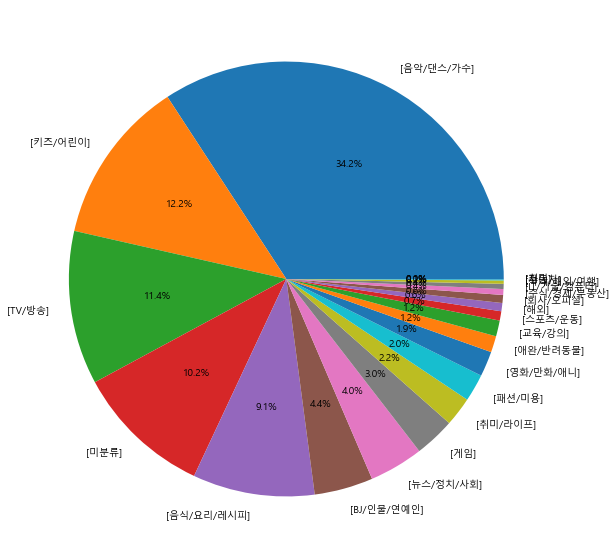

In [57]:
# figure()함수는 차트의 크기를 설정(x, y축 사이즈) 
plt.figure(figsize = (30, 10))
# pie()함수에 첫 번째 인자로 수치값을 labels 옵션에 각 항목에 표시될 명칭이 될 값을,
# autopct='%1.1f%%' 옵션(소수점 한자리까지 표시)을 통해 각 수치 값을 퍼센트로 표시
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

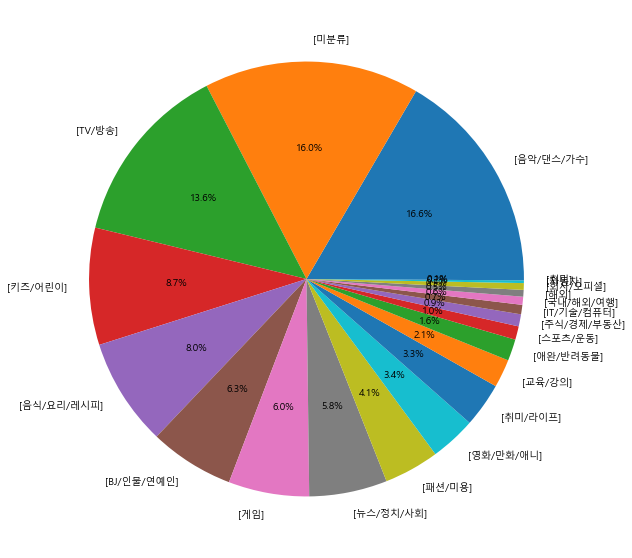

In [58]:
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()